In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,r2_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer

In [350]:
df = pd.read_csv("ml-olympiad-sustainable-urban-living/train.csv")
test = pd.read_csv("ml-olympiad-sustainable-urban-living/test.csv")

In [351]:
df = df.drop(columns = "Id")

In [352]:
test =test.drop(columns = "Id")

In [353]:
df.isnull().sum()

Property_Type                0
Property_Area                0
Number_of_Windows         1333
Number_of_Doors              0
Furnishing                 828
Frequency_of_Powercuts    1109
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 629
Dust_and_Noise             999
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

In [354]:
df.duplicated().sum()

0

In [355]:
X = df.drop(columns = "Habitability_score")
y = df.Habitability_score

In [356]:
num_cols = X.select_dtypes(exclude = "O").columns

In [357]:
knn_imputer = KNNImputer(n_neighbors = 5)

knn_imputed_num_df = pd.DataFrame(data = knn_imputer.fit_transform(X[num_cols]),columns = knn_imputer.get_feature_names_out())
knn_imputed_num_df

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
0,106.0,1.4,1.0,0.0,5.89,90.0,3.86
1,733.0,2.0,2.0,1.0,4.37,96.0,3.55
2,737.0,4.0,2.0,0.0,7.45,121.0,3.81
3,900.0,3.0,2.0,2.0,6.16,100.0,1.34
4,2238.0,14.0,6.0,0.0,5.46,116.0,4.77
...,...,...,...,...,...,...,...
31594,851.0,4.0,1.0,0.0,7.80,149.0,4.72
31595,315.0,1.0,1.0,0.0,5.92,82.0,4.50
31596,480.0,6.0,3.0,0.0,5.68,80.0,3.88
31597,642.0,1.0,2.0,1.0,7.09,162.0,3.76


In [358]:
si_imputer = SimpleImputer(strategy = "mean")

si_mean_imputed_num_df = pd.DataFrame(data = si_imputer.fit_transform(X[num_cols]),columns = si_imputer.get_feature_names_out())
si_mean_imputed_num_df


,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
0,106.0,3.926254,1.0,0.0,5.89,90.0,3.86
1,733.0,2.000000,2.0,1.0,4.37,96.0,3.55
2,737.0,4.000000,2.0,0.0,7.45,121.0,3.81
3,900.0,3.000000,2.0,2.0,6.16,100.0,1.34
4,2238.0,14.000000,6.0,0.0,5.46,116.0,4.77
...,...,...,...,...,...,...,...
31594,851.0,4.000000,1.0,0.0,7.80,149.0,4.72
31595,315.0,1.000000,1.0,0.0,5.92,82.0,4.50
31596,480.0,6.000000,3.0,0.0,5.68,80.0,3.88
31597,642.0,1.000000,2.0,1.0,7.09,162.0,3.76


In [359]:
si_imputer = SimpleImputer(strategy = "median")

si_median_imputed_num_df = pd.DataFrame(data = si_imputer.fit_transform(X[num_cols]),columns = si_imputer.get_feature_names_out())
si_median_imputed_num_df


,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
0,106.0,4.0,1.0,0.0,5.89,90.0,3.86
1,733.0,2.0,2.0,1.0,4.37,96.0,3.55
2,737.0,4.0,2.0,0.0,7.45,121.0,3.81
3,900.0,3.0,2.0,2.0,6.16,100.0,1.34
4,2238.0,14.0,6.0,0.0,5.46,116.0,4.77
...,...,...,...,...,...,...,...
31594,851.0,4.0,1.0,0.0,7.80,149.0,4.72
31595,315.0,1.0,1.0,0.0,5.92,82.0,4.50
31596,480.0,6.0,3.0,0.0,5.68,80.0,3.88
31597,642.0,1.0,2.0,1.0,7.09,162.0,3.76


In [360]:
si_imputer = SimpleImputer(strategy = "most_frequent")

si_most_frequent_imputed_num_df = pd.DataFrame(data = si_imputer.fit_transform(X[num_cols]),columns = si_imputer.get_feature_names_out())
si_most_frequent_imputed_num_df


,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
0,106.0,4.0,1.0,0.0,5.89,90.0,3.86
1,733.0,2.0,2.0,1.0,4.37,96.0,3.55
2,737.0,4.0,2.0,0.0,7.45,121.0,3.81
3,900.0,3.0,2.0,2.0,6.16,100.0,1.34
4,2238.0,14.0,6.0,0.0,5.46,116.0,4.77
...,...,...,...,...,...,...,...
31594,851.0,4.0,1.0,0.0,7.80,149.0,4.72
31595,315.0,1.0,1.0,0.0,5.92,82.0,4.50
31596,480.0,6.0,3.0,0.0,5.68,80.0,3.88
31597,642.0,1.0,2.0,1.0,7.09,162.0,3.76


In [361]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [362]:
iter_imputer = IterativeImputer(max_iter = 100,random_state= 42)

iter_imputed_num_df = pd.DataFrame(data = iter_imputer.fit_transform(X[num_cols]),columns = iter_imputer.get_feature_names_out())
test[num_cols] = pd.DataFrame(data = iter_imputer.transform(test[num_cols]),columns = iter_imputer.get_feature_names_out())


In [363]:
test.isnull().sum()

Property_Type               0
Property_Area               0
Number_of_Windows           0
Number_of_Doors             0
Furnishing                214
Frequency_of_Powercuts      0
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                158
Dust_and_Noise            220
Air_Quality_Index           0
Neighborhood_Review         0
dtype: int64

In [364]:
cat_cols = X.select_dtypes(include = "O").columns
cat_cols

Index(['Property_Type', 'Furnishing', 'Power_Backup', 'Water_Supply',
       'Crime_Rate', 'Dust_and_Noise'],
      dtype='object')

In [365]:
X[cat_cols].isnull().sum()

Property_Type       0
Furnishing        828
Power_Backup        0
Water_Supply        0
Crime_Rate        629
Dust_and_Noise    999
dtype: int64

In [366]:
si_imputer = SimpleImputer(strategy = "most_frequent")

si_most_frequent_imputed_cat_df = pd.DataFrame(data = si_imputer.fit_transform(X[cat_cols]),columns = si_imputer.get_feature_names_out())
si_most_frequent_imputed_cat_df


,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,Apartment,Semi_Furnished,No,Once in a day - Morning,Slightly below average,Medium
1,Apartment,Unfurnished,No,Once in a day - Evening,Well below average,Medium
2,Apartment,Fully Furnished,No,Once in a day - Morning,Slightly below average,Medium
3,Apartment,Unfurnished,Yes,Once in a day - Morning,Well above average,Medium
4,Bungalow,Fully Furnished,No,All time,Well below average,Medium
...,...,...,...,...,...,...
31594,Apartment,Semi_Furnished,No,All time,Well below average,Medium
31595,Container Home,Fully Furnished,Yes,Once in a day - Morning,Well below average,Medium
31596,Duplex,Semi_Furnished,No,Once in two days,Well below average,Medium
31597,Apartment,Semi_Furnished,No,Once in a day - Morning,Well below average,Medium


In [367]:
cat_miss_val_dropped_df = X[cat_cols].dropna()
cat_miss_val_dropped_df

,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,Apartment,Semi_Furnished,No,Once in a day - Morning,Slightly below average,Medium
1,Apartment,Unfurnished,No,Once in a day - Evening,Well below average,Medium
2,Apartment,Fully Furnished,No,Once in a day - Morning,Slightly below average,Medium
3,Apartment,Unfurnished,Yes,Once in a day - Morning,Well above average,Medium
4,Bungalow,Fully Furnished,No,All time,Well below average,Medium
...,...,...,...,...,...,...
31594,Apartment,Semi_Furnished,No,All time,Well below average,Medium
31595,Container Home,Fully Furnished,Yes,Once in a day - Morning,Well below average,Medium
31596,Duplex,Semi_Furnished,No,Once in two days,Well below average,Medium
31597,Apartment,Semi_Furnished,No,Once in a day - Morning,Well below average,Medium


In [368]:
miss_val_dropped_df = X.dropna()
miss_val_dropped_df

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
1,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55
2,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81
3,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34
4,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77
5,Single-family home,1185,3.0,3,Unfurnished,0.0,No,Once in a day - Morning,5.69,Well below average,Medium,91.0,4.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,Apartment,851,4.0,1,Semi_Furnished,0.0,No,All time,7.80,Well below average,Medium,149.0,4.72
31595,Container Home,315,1.0,1,Fully Furnished,0.0,Yes,Once in a day - Morning,5.92,Well below average,Medium,82.0,4.50
31596,Duplex,480,6.0,3,Semi_Furnished,0.0,No,Once in two days,5.68,Well below average,Medium,80.0,3.88
31597,Apartment,642,1.0,2,Semi_Furnished,1.0,No,Once in a day - Morning,7.09,Well below average,Medium,162.0,3.76


In [369]:
cat_miss_val_dropped_df.index

Index([    0,     1,     2,     3,     4,     5,     7,     9,    10,    11,
       ...
       31589, 31590, 31591, 31592, 31593, 31594, 31595, 31596, 31597, 31598],
      dtype='int64', length=29197)

In [370]:
X.loc[cat_miss_val_dropped_df.index,num_cols]

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
0,106,NaN,1,0.0,5.89,90.0,3.86
1,733,2.0,2,1.0,4.37,96.0,3.55
2,737,4.0,2,0.0,7.45,121.0,3.81
3,900,3.0,2,2.0,6.16,100.0,1.34
4,2238,14.0,6,0.0,5.46,116.0,4.77
...,...,...,...,...,...,...,...
31594,851,4.0,1,0.0,7.80,149.0,4.72
31595,315,1.0,1,0.0,5.92,82.0,4.50
31596,480,6.0,3,0.0,5.68,80.0,3.88
31597,642,1.0,2,1.0,7.09,162.0,3.76


In [371]:
num_imputed_df_list = [knn_imputed_num_df,si_mean_imputed_num_df,si_median_imputed_num_df,si_most_frequent_imputed_num_df,iter_imputed_num_df]
# num_imputed_df_list_name = [knn_imputed_df,si_mean_imputed_df,si_median_imputed_df,si_most_frequent_imputed_df,iter_imputed_df]

In [372]:
knn_imputed_df              =(pd.concat([knn_imputed_num_df,si_most_frequent_imputed_cat_df],axis = 1))
si_mean_imputed_df          =(pd.concat([si_mean_imputed_num_df,si_most_frequent_imputed_cat_df],axis = 1))
si_median_imputed_df        =(pd.concat([si_median_imputed_num_df,si_most_frequent_imputed_cat_df],axis = 1))
si_most_frequent_imputed_df =(pd.concat([si_most_frequent_imputed_num_df,si_most_frequent_imputed_cat_df],axis = 1))
iter_imputed_df             =(pd.concat([iter_imputed_num_df,si_most_frequent_imputed_cat_df],axis = 1))

    
    
    
  
    


In [373]:
knn_imputed_df_with_dropped_cat_missing_val              =(pd.concat([knn_imputed_num_df.loc[cat_miss_val_dropped_df.index],cat_miss_val_dropped_df],axis = 1))
si_mean_imputed_df_with_dropped_cat_missing_val          =(pd.concat([si_mean_imputed_num_df.loc[cat_miss_val_dropped_df.index],cat_miss_val_dropped_df],axis = 1))
si_median_imputed_df_with_dropped_cat_missing_val        =(pd.concat([si_median_imputed_num_df.loc[cat_miss_val_dropped_df.index],cat_miss_val_dropped_df],axis = 1))
si_most_frequent_imputed_df_with_dropped_cat_missing_val =(pd.concat([si_most_frequent_imputed_num_df.loc[cat_miss_val_dropped_df.index],cat_miss_val_dropped_df],axis = 1))
iter_imputed_df_with_dropped_cat_missing_val             =(pd.concat([iter_imputed_num_df.loc[cat_miss_val_dropped_df.index],cat_miss_val_dropped_df],axis = 1))

In [374]:
list_df_after_missing_values= [knn_imputed_df,
                                si_mean_imputed_df,
                                si_median_imputed_df,
                                si_most_frequent_imputed_df,
                                iter_imputed_df,
                                knn_imputed_df_with_dropped_cat_missing_val,
                                si_mean_imputed_df_with_dropped_cat_missing_val,
                                si_median_imputed_df_with_dropped_cat_missing_val,
                                si_most_frequent_imputed_df_with_dropped_cat_missing_val,
                                iter_imputed_df_with_dropped_cat_missing_val,
                                miss_val_dropped_df]

In [375]:
list_df_after_missing_values_names= ["knn_imputed_df",
                                "si_mean_imputed_df",
                                "si_median_imputed_df",
                                "si_most_frequent_imputed_df",
                                "iter_imputed_df",
                                "knn_imputed_df_with_dropped_cat_missing_val",
                                "si_mean_imputed_df_with_dropped_cat_missing_val",
                                "si_median_imputed_df_with_dropped_cat_missing_val",
                                "si_most_frequent_imputed_df_with_dropped_cat_missing_val",
                                "iter_imputed_df_with_dropped_cat_missing_val",
                                "miss_val_dropped_df"]

In [376]:
ord = OrdinalEncoder(handle_unknown = "use_encoded_value",unknown_value = -1,dtype = "float")
ohe = OneHotEncoder(sparse_output = False,handle_unknown = "ignore",drop = "first")

In [377]:
for i in list_df_after_missing_values:
    i.loc[:,"Furnishing"] = ord.fit_transform(i[["Furnishing"]])

In [378]:
test.loc[:,"Furnishing"] = ord.transform(test[["Furnishing"]])

In [379]:
new_cat_cols_list = cat_cols.to_list()
new_cat_cols_list

['Property_Type',
 'Furnishing',
 'Power_Backup',
 'Water_Supply',
 'Crime_Rate',
 'Dust_and_Noise']

In [380]:
new_cat_cols_list.remove("Furnishing")

In [381]:
new_cat_cols_list

['Property_Type',
 'Power_Backup',
 'Water_Supply',
 'Crime_Rate',
 'Dust_and_Noise']

In [382]:
for i in list_df_after_missing_values:
    i.loc[:, ohe.get_feature_names_out()] = ohe.fit_transform(i[new_cat_cols_list])
    i.drop(columns = new_cat_cols_list,inplace = True)


C:\Users\gaura\AppData\Local\Temp\ipykernel_2840\523165461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop(columns = new_cat_cols_list,inplace = True)


In [383]:
test.loc[:, ohe.get_feature_names_out()] = ohe.transform(test[new_cat_cols_list])
test.drop(columns = new_cat_cols_list,inplace = True)

C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [384]:
test

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Property_Type_Apartment,Property_Type_Bungalow,...,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Well below average,Dust_and_Noise_Low,Dust_and_Noise_Medium
0,1521.0,5.0,1.0,2.0,0.0,7.61,156.0,4.71,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2233.0,2.0,1.0,1.0,0.0,5.28,82.0,4.50,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,986.0,1.0,1.0,2.0,0.0,7.72,91.0,4.79,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1625.0,2.0,1.0,1.0,0.0,6.19,159.0,4.09,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1166.0,2.0,2.0,0.0,0.0,5.84,82.0,3.56,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,1120.0,3.0,2.0,-1.0,0.0,5.55,80.0,3.56,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7896,445.0,1.0,3.0,0.0,1.0,5.70,86.0,2.93,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7897,3780.0,6.0,6.0,2.0,0.0,6.84,137.0,3.80,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7898,1266.0,3.0,1.0,1.0,0.0,4.60,88.0,3.25,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [385]:
knn_imputed_df.Furnishing = knn_imputed_df.Furnishing.astype("float")
si_mean_imputed_df.Furnishing = si_mean_imputed_df.Furnishing.astype("float")
si_median_imputed_df.Furnishing = si_median_imputed_df.Furnishing.astype("float")
si_most_frequent_imputed_df.Furnishing = si_most_frequent_imputed_df.Furnishing.astype("float")
iter_imputed_df.Furnishing = iter_imputed_df.Furnishing.astype("float")
knn_imputed_df_with_dropped_cat_missing_val.Furnishing = knn_imputed_df_with_dropped_cat_missing_val.Furnishing.astype("float")
si_mean_imputed_df_with_dropped_cat_missing_val.Furnishing = si_mean_imputed_df_with_dropped_cat_missing_val.Furnishing.astype("float")
si_median_imputed_df_with_dropped_cat_missing_val.Furnishing = si_median_imputed_df_with_dropped_cat_missing_val.Furnishing.astype("float")
si_most_frequent_imputed_df_with_dropped_cat_missing_val.Furnishing = si_most_frequent_imputed_df_with_dropped_cat_missing_val.Furnishing.astype("float")
iter_imputed_df_with_dropped_cat_missing_val.Furnishing = iter_imputed_df_with_dropped_cat_missing_val.Furnishing.astype("float")
miss_val_dropped_df.Furnishing = miss_val_dropped_df.Furnishing.astype("float")

C:\Users\gaura\AppData\Local\Temp\ipykernel_2840\1293442090.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_val_dropped_df.Furnishing = miss_val_dropped_df.Furnishing.astype("float")


In [386]:
result_df = pd.DataFrame({
    "method": [],
    "r2_train": [],
    "r2_test": [],
    "adj_r2_train": [],
    "adj_r2_test": [],
    "train_rmse": [],
    "test_rmse":[]
})

In [387]:
def evaluation(method,X_train, X_test, y_train, y_test):
    model = LinearRegression()
    n_r_train, n_c_train = X_train.shape
    n_r_test,  n_c_test = X_test.shape

    # model fit
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # r2 score
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    # adj r2
    adj_r2_train = 1 - ((1 - train_r2)*(n_r_train - 1)/ (n_r_train - n_c_train - 1))
    adj_r2_test = 1 - ((1 - test_r2)*(n_r_test - 1)/ (n_r_test - n_c_test - 1))

    # mae
    train_rmse = root_mean_squared_error(y_train, y_pred_train)
    test_rmse = root_mean_squared_error(y_test, y_pred_test)

    temp_df = pd.DataFrame({
    "method": [method],
    "r2_train": [round(train_r2,4)],
    "r2_test": [round(test_r2,4)],
    "adj_r2_train": [round(adj_r2_train,4)],
    "adj_r2_test": [round(adj_r2_test,4)],
    "train_rmse": [round(train_rmse,4)],
    "test_rmse":[round(test_rmse,4)]
      })
    global result_df
    result_df = pd.concat([result_df, temp_df]).reset_index(drop = True)


#     print(f"r2 score---")
#     print(f"train_r2: {round(train_r2,4)}, test_r2: {round(test_r2,4)}")
#     print("-----------------")
#     print(f"adj r2 score---")
#     print(f"train_adj_r2: {round(adj_r2_train,4)}, test_adj_r2: {round(adj_r2_test,4)}")
#     print("-----------------")
#     print(f"MAE---")
#     print(f"train_mae: {round(train_mae,4)}, test_mae: {round(test_mae,4)}")
#     print("-----------------")
    return result_df


In [388]:
for j,i in enumerate(list_df_after_missing_values):
    
    X_train, X_test, y_train, y_test = tts(i,y[i.index],test_size = 0.25, random_state = 42)
    evaluation(f"baseline_{list_df_after_missing_values_names[j]}",X_train,X_test,y_train,y_test)

In [389]:
result_df

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_rmse,test_rmse
0,baseline_knn_imputed_df,0.5891,0.5717,0.5887,0.5704,9.1357,9.0453
1,baseline_si_mean_imputed_df,0.5892,0.5716,0.5888,0.5703,9.1349,9.0463
2,baseline_si_median_imputed_df,0.5891,0.5714,0.5887,0.5701,9.1359,9.0483
3,baseline_si_most_frequent_imputed_df,0.5891,0.5714,0.5887,0.5701,9.1359,9.0483
4,baseline_iter_imputed_df,0.5893,0.5720,0.5889,0.5707,9.1341,9.0422
5,baseline_knn_imputed_df_with_dropped_cat_missi...,0.5863,0.5941,0.5859,0.5927,9.0573,9.0361
6,baseline_si_mean_imputed_df_with_dropped_cat_m...,0.5863,0.5940,0.5859,0.5927,9.0570,9.0371
7,baseline_si_median_imputed_df_with_dropped_cat...,0.5864,0.5938,0.5859,0.5924,9.0567,9.0397
8,baseline_si_most_frequent_imputed_df_with_drop...,0.5864,0.5938,0.5859,0.5924,9.0567,9.0397
9,baseline_iter_imputed_df_with_dropped_cat_miss...,0.5863,0.5941,0.5859,0.5928,9.0570,9.0357


In [390]:
# iter_imputed_df_with_dropped_cat_missing_val gives best score for RMSE,R2,Adjusted R2

In [391]:
iter_imputed_df_with_dropped_cat_missing_val[num_cols]

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
0,106.0,2.505922,1.0,0.0,5.89,90.0,3.86
1,733.0,2.000000,2.0,1.0,4.37,96.0,3.55
2,737.0,4.000000,2.0,0.0,7.45,121.0,3.81
3,900.0,3.000000,2.0,2.0,6.16,100.0,1.34
4,2238.0,14.000000,6.0,0.0,5.46,116.0,4.77
...,...,...,...,...,...,...,...
31594,851.0,4.000000,1.0,0.0,7.80,149.0,4.72
31595,315.0,1.000000,1.0,0.0,5.92,82.0,4.50
31596,480.0,6.000000,3.0,0.0,5.68,80.0,3.88
31597,642.0,1.000000,2.0,1.0,7.09,162.0,3.76


In [392]:
X_train, X_test, y_train, y_test = tts(iter_imputed_df_with_dropped_cat_missing_val,y[iter_imputed_df_with_dropped_cat_missing_val.index],test_size = 0.25, random_state = 42)

In [393]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21897, 24), (7300, 24), (21897,), (7300,))

In [394]:
# standardscaling 

In [395]:
X_train.drop(columns = num_cols)

,Furnishing,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home,Power_Backup_No,Power_Backup_Yes,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Well below average,Dust_and_Noise_Low,Dust_and_Noise_Medium
23430,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
13113,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
18272,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
16684,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9584,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23329,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5841,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
930,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
17053,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [396]:
std_scaler = StandardScaler()

In [397]:
X_train_num_stdscl = pd.DataFrame(data = std_scaler.fit_transform(X_train[num_cols]),columns = std_scaler.get_feature_names_out(),index=X_train.index)
X_test_num_stdscl = pd.DataFrame(data = std_scaler.transform(X_test[num_cols]),columns = std_scaler.get_feature_names_out(),index=X_test.index)

In [398]:
X_train_cat_stdscl = X_train.drop(columns = num_cols)
X_test_cat_stdscl = X_test.drop(columns = num_cols)

In [399]:
X_train_std_scaler = pd.concat([X_train_num_stdscl,X_train_cat_stdscl],axis = 1)
X_test_std_scaler = pd.concat([X_test_num_stdscl,X_test_cat_stdscl],axis = 1)

In [400]:
evaluation("Standard Scaling",X_train_std_scaler,X_test_std_scaler,y_train,y_test)

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_rmse,test_rmse
0,baseline_knn_imputed_df,0.5891,0.5717,0.5887,0.5704,9.1357,9.0453
1,baseline_si_mean_imputed_df,0.5892,0.5716,0.5888,0.5703,9.1349,9.0463
2,baseline_si_median_imputed_df,0.5891,0.5714,0.5887,0.5701,9.1359,9.0483
3,baseline_si_most_frequent_imputed_df,0.5891,0.5714,0.5887,0.5701,9.1359,9.0483
4,baseline_iter_imputed_df,0.5893,0.5720,0.5889,0.5707,9.1341,9.0422
5,baseline_knn_imputed_df_with_dropped_cat_missi...,0.5863,0.5941,0.5859,0.5927,9.0573,9.0361
6,baseline_si_mean_imputed_df_with_dropped_cat_m...,0.5863,0.5940,0.5859,0.5927,9.0570,9.0371
7,baseline_si_median_imputed_df_with_dropped_cat...,0.5864,0.5938,0.5859,0.5924,9.0567,9.0397
8,baseline_si_most_frequent_imputed_df_with_drop...,0.5864,0.5938,0.5859,0.5924,9.0567,9.0397
9,baseline_iter_imputed_df_with_dropped_cat_miss...,0.5863,0.5941,0.5859,0.5928,9.0570,9.0357


In [401]:
def z_score(df, col):
    mean = df[col].mean()
    std = df[col].std()

    ll = (-3 * std) + mean
    ul = (3 * std) + mean

    mask = (df[col] < ll) | (df[col] > ul)
    temp = df[mask]

    if len(temp)>0:
        print(f"Method: Zscore Detection")
        print(f"Column: {col}")
        print(f"Lower bound: {round(ll, 2)}")
        print(f"Upper bound: {round(ul, 2)}")
        print(f"number of outliers in {col}: {len(temp)}")
        print(f"percentage of outliers: {round(len(temp) / len(df) * 100, 2)} %")
        print("---------------------------------------------\n")

    return [len(temp), temp]


def iqr_limit(df, col):

    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1
    uw = q3 + 1.5 * iqr
    lw = q1 - 1.5 * iqr

    mask = (df[col] > uw) | (df[col] < lw)
    temp = df[mask]

    if len(temp)>0:
            print(f"Method: IQR Detection")
            print(f"Column: {col}")
            print(f"Lower Whiskers: {round(lw, 5)}")
            print(f"Upper Whiskers: {round(uw, 5)}")
            print(f"Number of Outliers in {col}: {len(temp)}")
            print(f"Percentage of Outliers in {col}: {round((len(temp) / len(df) * 100), 2)}%")
            print("---------------------------------------------\n")

    return [len(temp), temp]

def find_outliers(df, col, method="z_score"):
    if method == "z_score":
        return z_score(df, col)
    else:
        return iqr_limit(df, col)

def detect_outliers(df):
    df = df.select_dtypes(exclude = "object")
    z_score_cols = []
    iqr_cols = []
    for col in df:
        skewness = df[col].skew()
        if -0.5 <= skewness <= 0.5:
            method = "z_score"
        else:
            method = "IQR"

        num_outlier = find_outliers(df, col, method)[0]
        if num_outlier:
            if method == "z_score":
                z_score_cols.append(col)
            else:
                iqr_cols.append(col)
    return z_score_cols,iqr_cols

In [402]:
detect_outliers(X_train_std_scaler[num_cols])

Method: IQR Detection
Column: Property_Area
Lower Whiskers: -1.45889
Upper Whiskers: 1.19422
Number of Outliers in Property_Area: 953
Percentage of Outliers in Property_Area: 4.35%
---------------------------------------------

Method: IQR Detection
Column: Number_of_Windows
Lower Whiskers: -2.44469
Upper Whiskers: 2.13803
Number of Outliers in Number_of_Windows: 1071
Percentage of Outliers in Number_of_Windows: 4.89%
---------------------------------------------

Method: IQR Detection
Column: Number_of_Doors
Lower Whiskers: -3.69139
Upper Whiskers: 3.136
Number of Outliers in Number_of_Doors: 480
Percentage of Outliers in Number_of_Doors: 2.19%
---------------------------------------------

Method: IQR Detection
Column: Frequency_of_Powercuts
Lower Whiskers: -2.6646
Upper Whiskers: 2.70829
Number of Outliers in Frequency_of_Powercuts: 669
Percentage of Outliers in Frequency_of_Powercuts: 3.06%
---------------------------------------------

Method: IQR Detection
Column: Traffic_Density

([],
 ['Property_Area',
  'Number_of_Windows',
  'Number_of_Doors',
  'Frequency_of_Powercuts',
  'Traffic_Density_Score',
  'Air_Quality_Index',
  'Neighborhood_Review'])

In [403]:
X_train_dropped_outlier_Property_Area = X_train_std_scaler.drop(index = (X_train_std_scaler["Property_Area"][(X_train_std_scaler["Property_Area"] > 1.19422) | (X_train_std_scaler["Property_Area"] < -1.45889)].index))
X_train_dropped_outlier_Number_of_Windows = X_train_dropped_outlier_Property_Area.drop(index = (X_train_dropped_outlier_Property_Area["Number_of_Windows"][(X_train_dropped_outlier_Property_Area["Number_of_Windows"] > 2.13803) | (X_train_dropped_outlier_Property_Area["Number_of_Windows"] < -2.44469)].index))
X_train_dropped_outlier_Air_Quality_Index = X_train_dropped_outlier_Number_of_Windows.drop(index = (X_train_dropped_outlier_Number_of_Windows["Air_Quality_Index"][(X_train_dropped_outlier_Number_of_Windows["Air_Quality_Index"] > 1.41988) | (X_train_dropped_outlier_Number_of_Windows["Air_Quality_Index"] < -1.53162)].index))


In [404]:

evaluation("dropped_outlier",X_train_dropped_outlier_Air_Quality_Index,X_test_std_scaler,y_train[X_train_dropped_outlier_Air_Quality_Index.index],y_test)

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_rmse,test_rmse
0,baseline_knn_imputed_df,0.5891,0.5717,0.5887,0.5704,9.1357,9.0453
1,baseline_si_mean_imputed_df,0.5892,0.5716,0.5888,0.5703,9.1349,9.0463
2,baseline_si_median_imputed_df,0.5891,0.5714,0.5887,0.5701,9.1359,9.0483
3,baseline_si_most_frequent_imputed_df,0.5891,0.5714,0.5887,0.5701,9.1359,9.0483
4,baseline_iter_imputed_df,0.5893,0.5720,0.5889,0.5707,9.1341,9.0422
5,baseline_knn_imputed_df_with_dropped_cat_missi...,0.5863,0.5941,0.5859,0.5927,9.0573,9.0361
6,baseline_si_mean_imputed_df_with_dropped_cat_m...,0.5863,0.5940,0.5859,0.5927,9.0570,9.0371
7,baseline_si_median_imputed_df_with_dropped_cat...,0.5864,0.5938,0.5859,0.5924,9.0567,9.0397
8,baseline_si_most_frequent_imputed_df_with_drop...,0.5864,0.5938,0.5859,0.5924,9.0567,9.0397
9,baseline_iter_imputed_df_with_dropped_cat_miss...,0.5863,0.5941,0.5859,0.5928,9.0570,9.0357


In [405]:
from scipy.stats.mstats import winsorize

In [406]:
wins_list = ["Property_Area","Number_of_Windows","Air_Quality_Index"]

for i in wins_list:
    X_train_std_scaler[i] = winsorize(X_train_std_scaler[i], limits=[0.05, 0.05])


In [407]:
evaluation("Standard Scaling with outlier winsorization",X_train_std_scaler,X_test_std_scaler,y_train,y_test)

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_rmse,test_rmse
0,baseline_knn_imputed_df,0.5891,0.5717,0.5887,0.5704,9.1357,9.0453
1,baseline_si_mean_imputed_df,0.5892,0.5716,0.5888,0.5703,9.1349,9.0463
2,baseline_si_median_imputed_df,0.5891,0.5714,0.5887,0.5701,9.1359,9.0483
3,baseline_si_most_frequent_imputed_df,0.5891,0.5714,0.5887,0.5701,9.1359,9.0483
4,baseline_iter_imputed_df,0.5893,0.5720,0.5889,0.5707,9.1341,9.0422
5,baseline_knn_imputed_df_with_dropped_cat_missi...,0.5863,0.5941,0.5859,0.5927,9.0573,9.0361
6,baseline_si_mean_imputed_df_with_dropped_cat_m...,0.5863,0.5940,0.5859,0.5927,9.0570,9.0371
7,baseline_si_median_imputed_df_with_dropped_cat...,0.5864,0.5938,0.5859,0.5924,9.0567,9.0397
8,baseline_si_most_frequent_imputed_df_with_drop...,0.5864,0.5938,0.5859,0.5924,9.0567,9.0397
9,baseline_iter_imputed_df_with_dropped_cat_miss...,0.5863,0.5941,0.5859,0.5928,9.0570,9.0357


In [408]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures((1,2), include_bias = False)
X_train_poly = pd.DataFrame(poly.fit_transform(X_train),
             columns = poly.get_feature_names_out(), index = X_train.index)
X_test_poly = pd.DataFrame(poly.transform(X_test),
             columns = poly.get_feature_names_out(), index = X_test.index)

In [409]:
evaluation("polynomial features with degree (1,2) for all columns", X_train_poly, X_test_poly,y_train,y_test)

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_rmse,test_rmse
0,baseline_knn_imputed_df,0.5891,0.5717,0.5887,0.5704,9.1357,9.0453
1,baseline_si_mean_imputed_df,0.5892,0.5716,0.5888,0.5703,9.1349,9.0463
2,baseline_si_median_imputed_df,0.5891,0.5714,0.5887,0.5701,9.1359,9.0483
3,baseline_si_most_frequent_imputed_df,0.5891,0.5714,0.5887,0.5701,9.1359,9.0483
4,baseline_iter_imputed_df,0.5893,0.5720,0.5889,0.5707,9.1341,9.0422
5,baseline_knn_imputed_df_with_dropped_cat_missi...,0.5863,0.5941,0.5859,0.5927,9.0573,9.0361
6,baseline_si_mean_imputed_df_with_dropped_cat_m...,0.5863,0.5940,0.5859,0.5927,9.0570,9.0371
7,baseline_si_median_imputed_df_with_dropped_cat...,0.5864,0.5938,0.5859,0.5924,9.0567,9.0397
8,baseline_si_most_frequent_imputed_df_with_drop...,0.5864,0.5938,0.5859,0.5924,9.0567,9.0397
9,baseline_iter_imputed_df_with_dropped_cat_miss...,0.5863,0.5941,0.5859,0.5928,9.0570,9.0357


In [410]:
evaluation("polynomial features with degree (1,2) for all columns and log of y", X_train_poly, X_test_poly,np.log(y_train),np.log(y_test))

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_rmse,test_rmse
0,baseline_knn_imputed_df,0.5891,0.5717,0.5887,0.5704,9.1357,9.0453
1,baseline_si_mean_imputed_df,0.5892,0.5716,0.5888,0.5703,9.1349,9.0463
2,baseline_si_median_imputed_df,0.5891,0.5714,0.5887,0.5701,9.1359,9.0483
3,baseline_si_most_frequent_imputed_df,0.5891,0.5714,0.5887,0.5701,9.1359,9.0483
4,baseline_iter_imputed_df,0.5893,0.5720,0.5889,0.5707,9.1341,9.0422
5,baseline_knn_imputed_df_with_dropped_cat_missi...,0.5863,0.5941,0.5859,0.5927,9.0573,9.0361
6,baseline_si_mean_imputed_df_with_dropped_cat_m...,0.5863,0.5940,0.5859,0.5927,9.0570,9.0371
7,baseline_si_median_imputed_df_with_dropped_cat...,0.5864,0.5938,0.5859,0.5924,9.0567,9.0397
8,baseline_si_most_frequent_imputed_df_with_drop...,0.5864,0.5938,0.5859,0.5924,9.0567,9.0397
9,baseline_iter_imputed_df_with_dropped_cat_miss...,0.5863,0.5941,0.5859,0.5928,9.0570,9.0357


In [411]:
# p- values
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_std_scaler)
# X_test_sm = sm.add_constant(X_test_enc)
model = sm.OLS(y_train, X_train_std_scaler)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Habitability_score   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          4.440e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:37:51   Log-Likelihood:                         -82795.
No. Observations:               21897   AIC:                                  1.656e+05
Df Residuals:                   21873   BIC:                                  1.658e+05
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Property_Area                            0.7159      0.305      2.349      0.019       0.118       1.313
Number_of_Windows                        0.2512      0.155      1.620      0.105      -0.053       0.555
Number_of_Doors                          0.1952      0.086      2.259      0.024       0.026       0.365
Frequency_of_Powercuts                 -17.4162      0.379    -45.978      0.000     -18.159     -16.674
Traffic_Density_Score                    0.2169      0.101      2.151      0.032       0.019       0.415
Air_Quality_Index                       -2.7105      0.207    -13.095      0.000      -3.116      -2.305
Neighborhood_Review                    -24.2066      0.636    -38.049      0.000     -25.454     -22.960
Furnishing                              -8.0666      0.105    -77.015      0.000      -8.272      -7.861
Property_Type_Apartment                 28.2895      0.526     53.821      0.000      27.259      29.320
Property_Type_Bungalow                  31.6803      0.663     47.776      0.000      30.381      32.980
Property_Type_Container Home            27.6604      0.590     46.876      0.000      26.504      28.817
Property_Type_Duplex                    29.9206      0.543     55.091      0.000      28.856      30.985
Property_Type_Single-family home        30.6515      0.522     58.771      0.000      29.629      31.674
Power_Backup_No                         16.0188      0.443     36.148      0.000      15.150      16.887
Power_Backup_Yes                        24.9476      0.462     54.022      0.000      24.042      25.853
Water_Supply_NOT MENTIONED              -8.6961      0.815    -10.669      0.000     -10.294      -7.098
Water_Supply_Once in a day - Evening   -23.5754      0.536    -44.023      0.000     -24.625     -22.526
Water_Supply_Once in a day - Morning   -11.1577      0.310    -36.046      0.000     -11.764     -10.551
Water_Supply_Once in two days          -37.5251      0.821    -45.698      0.000     -39.135     -35.916
Crime_Rate_Slightly below average       29.2041      0.529     55.182      0.000      28.167      30.241
Crime_Rate_Well above average          -26.3695      0.616    -42.830      0.000     -27.576     -25.163
Crime_Rate_Well below average           52.5152      0.996     52.702      0.000      50.562      54.468
Dust_and_Noise_Low                      18.3263      0.485     37.760      0.000      17.375      19.278
Dust_and_Noise_Medium                   11.1357      0.280     39.839      0.000      10.588      11.684
==============================================================================
Omnibus:                     1021.166   Durbin-Watson:                

In [412]:
p_value_grtr = model_fit.pvalues[model_fit.pvalues > .05].index.tolist()

In [413]:
# Mutual Information (mi)# mutual info

from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X_train_std_scaler, y_train)
mi_scores

mi = pd.DataFrame()

mi["col_name"] = X_train_std_scaler.columns
mi["mi_score"] = mi_scores

mi.sort_values(by = "mi_score", ascending = False)

,col_name,mi_score
6,Neighborhood_Review,0.179763
7,Furnishing,0.111102
21,Crime_Rate_Well below average,0.063450
14,Power_Backup_Yes,0.042379
13,Power_Backup_No,0.042113
20,Crime_Rate_Well above average,0.041296
3,Frequency_of_Powercuts,0.030747
0,Property_Area,0.014590
1,Number_of_Windows,0.008466
18,Water_Supply_Once in two days,0.007621


In [414]:
mi_grtr = mi[mi.mi_score < 0.001].col_name.tolist()

<Axes: >

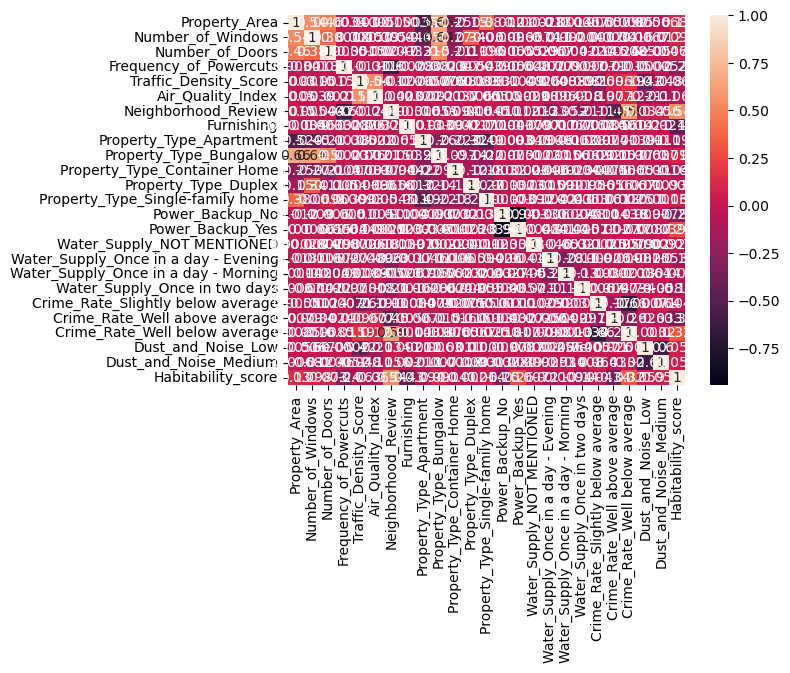

In [415]:
X_corr = X_train_std_scaler.copy()
X_corr["Habitability_score"] = y_train
sns.heatmap(X_corr.corr(), annot = True)

<Axes: >

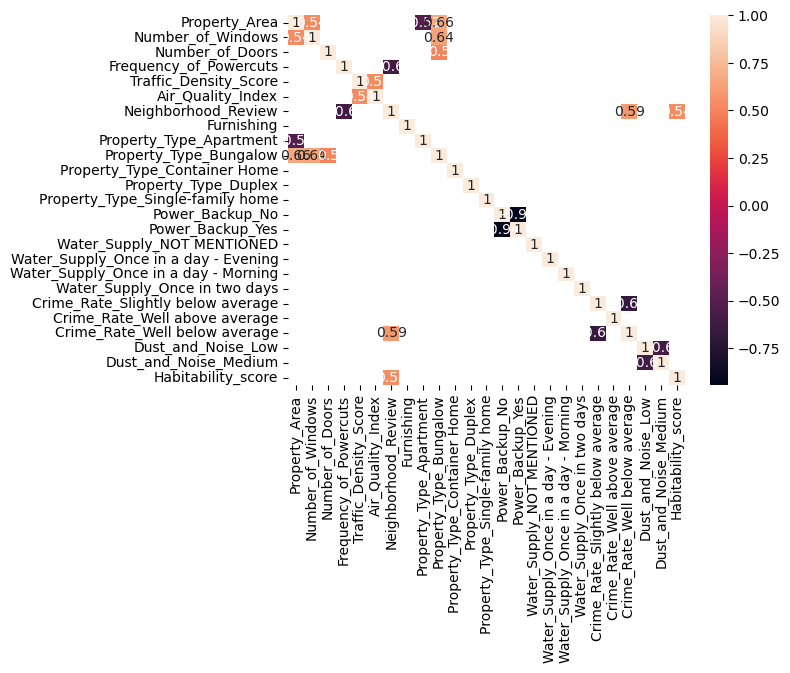

In [416]:
sns.heatmap(X_corr.corr()[np.abs(X_corr.corr())>0.5], annot = True)

In [417]:
# Import library for VIF (variance inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

vif = calc_vif(X_train_std_scaler)
vif.sort_values(by = ["VIF"], ascending = False)

,variables,VIF
21,Crime_Rate_Well below average,97.023285
6,Neighborhood_Review,78.584553
13,Power_Backup_No,28.880274
3,Frequency_of_Powercuts,27.858665
8,Property_Type_Apartment,19.784225
19,Crime_Rate_Slightly below average,16.393611
12,Property_Type_Single-family home,15.295658
23,Dust_and_Noise_Medium,13.089928
16,Water_Supply_Once in a day - Evening,10.926690
14,Power_Backup_Yes,9.173225


In [418]:
vif_grtr = vif[vif.VIF > 25].variables.tolist()

In [419]:
# lasso
model_lasso = Lasso(alpha=.03)
model_lasso.fit(X_train_std_scaler, y_train)
col_df = pd.DataFrame({
    "col_name": X_train_std_scaler.columns,
    "lasso_coef": model_lasso.coef_
})
col_df

,col_name,lasso_coef
0,Property_Area,1.897833
1,Number_of_Windows,0.769845
2,Number_of_Doors,0.270231
3,Frequency_of_Powercuts,1.481325
4,Traffic_Density_Score,-0.130647
5,Air_Quality_Index,-0.000000
6,Neighborhood_Review,8.237655
7,Furnishing,-8.840664
8,Property_Type_Apartment,-0.477007
9,Property_Type_Bungalow,0.000000


In [420]:
lasso_grtr = col_df[col_df.lasso_coef ==0].col_name.tolist()
lasso_grtr

['Air_Quality_Index',
 'Property_Type_Bungalow',
 'Property_Type_Duplex',
 'Water_Supply_NOT MENTIONED',
 'Crime_Rate_Well below average']

In [421]:
unimportant_col = ["Water_Supply_Once in a day - Morning","Water_Supply_NOT MENTIONED",
                  "Property_Type_Duplex","Number_of_Doors"]

In [422]:
imp_cols = X_train_std_scaler.drop(columns = unimportant_col ).columns.tolist()


In [423]:
poly = PolynomialFeatures((2), include_bias = False)
X_train_poly = poly.fit_transform(X_train[imp_cols])
X_test_poly = poly.transform(X_test[imp_cols])
evaluation("poly with degree 2 imp cols", X_train_poly,X_test_poly, np.log(y_train), np.log(y_test))

,method,r2_train,r2_test,adj_r2_train,adj_r2_test,train_rmse,test_rmse
0,baseline_knn_imputed_df,0.5891,0.5717,0.5887,0.5704,9.1357,9.0453
1,baseline_si_mean_imputed_df,0.5892,0.5716,0.5888,0.5703,9.1349,9.0463
2,baseline_si_median_imputed_df,0.5891,0.5714,0.5887,0.5701,9.1359,9.0483
3,baseline_si_most_frequent_imputed_df,0.5891,0.5714,0.5887,0.5701,9.1359,9.0483
4,baseline_iter_imputed_df,0.5893,0.5720,0.5889,0.5707,9.1341,9.0422
5,baseline_knn_imputed_df_with_dropped_cat_missi...,0.5863,0.5941,0.5859,0.5927,9.0573,9.0361
6,baseline_si_mean_imputed_df_with_dropped_cat_m...,0.5863,0.5940,0.5859,0.5927,9.0570,9.0371
7,baseline_si_median_imputed_df_with_dropped_cat...,0.5864,0.5938,0.5859,0.5924,9.0567,9.0397
8,baseline_si_most_frequent_imputed_df_with_drop...,0.5864,0.5938,0.5859,0.5924,9.0567,9.0397
9,baseline_iter_imputed_df_with_dropped_cat_miss...,0.5863,0.5941,0.5859,0.5928,9.0570,9.0357


In [424]:
poly = PolynomialFeatures((2), include_bias = False)
X_train_poly = poly.fit_transform(X_train[imp_cols])
X_test_poly = poly.transform(test[imp_cols])

In [425]:
model = LinearRegression()

In [426]:
model.fit(X_train_poly, y_train)
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

In [427]:
train_rmse = root_mean_squared_error(y_train, y_pred_train)

In [428]:
train_rmse

7.513253542642573

In [429]:
(y_pred_test)

array([75.24608493, 80.44542122, 72.95102282, ..., 80.7872959 ,
       64.65393623, 82.24380159])

In [430]:
y_pred_test.shape

(7900,)

In [431]:
test_id = pd.read_csv("ml-olympiad-sustainable-urban-living/test.csv")

In [432]:
xi = pd.DataFrame({"Id" : test_id.Id ,"Habitability_score":y_pred_test})

In [433]:
xi

,Id,Habitability_score
0,0x6808,75.246085
1,0x6a98,80.445421
2,0xacc0,72.951023
3,0x8225,78.843624
4,0xaee8,80.570100
...,...,...
7895,0x6e26,85.197911
7896,0xa013,77.054688
7897,0x9721,80.787296
7898,0x7e25,64.653936


In [434]:
xi.to_csv('sample_sub.csv', index=False)